# Rainfall Prediction
**Author:** Vyomkesh Vyas  
**Date created:** 14th July 2025

This notebook aims to build a linear model for rainfall prediction in Austin.  

In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

We begin our analysis by importing the necessary libraries and loading the dataset. There are around 1319 rows and 20 columns in the dataset. The columns can be categorised as below:  
- **Temperature:** TempHighF, TempAvgF, TempLowF  
- **Dew Point:** DewPointHighF, DewPointAvgF, DewPointLowF  
- **Humidity:** HumidityHighPercent, HumidityAvgPercent, HumidityLowPercent  
- **Sea Level Pressure:** SeaLevelPressureHighInches, SeaLevelPressureAvgInches, SeaLevelPressureLowInches  
- **Visibility:** VisibilityHighMiles, VisibilityAvgMiles, VisibilityLowMiles  
- **Wind Speed:** WindHighMPH, WindAvgMPH, WindGustMPH  
- **PrecipitationSumInches**
- **Events**

In [68]:
# Loading the dataset
aw_df = pd.read_csv('data/austin_weather.csv')
aw_df['Date'] = pd.to_datetime(aw_df['Date'])
aw_df.sort_values('Date', inplace=True)
aw_df.set_index('Date', inplace=True)

# Displaying the first few rows of the dataset
print(aw_df.shape)
aw_df.head()

(1319, 20)


,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
Date,,,,,,,,,,,,,,,,,,,,
2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


There are no missing values in our data...

In [69]:
# Checking for missing values
print("Missing values in each column:")
print(aw_df.isnull().sum())

Missing values in each column:
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64


We will drop the 'Events' column and clean the dataset

In [70]:
# Dropping the 'Events' column as it is not numeric and not needed for analysis
aw_df.drop(['Events'], axis=1, inplace=True)

# Cleaning the dataset
aw_df.replace('T', 0.0, inplace=True)
aw_df.replace('-', 0.0, inplace=True)

# Converting columns to numeric
aw_df = aw_df.apply(pd.to_numeric)

# Describing the dataset
aw_df.describe()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957,61.188779,56.332070,50.663381,87.739196,66.570887,44.890826,30.043715,29.954617,29.863813,9.900682,9.078848,6.777862,13.211524,5.000758,21.308567,0.114397
std,14.766523,14.045904,14.190648,14.268932,15.387522,16.563451,11.548416,12.721695,17.051788,1.446235,1.441037,1.436731,0.962889,1.693019,3.723761,3.461032,2.093961,5.983374,0.428175
min,32.000000,29.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,62.000000,49.000000,52.000000,46.000000,38.000000,85.000000,59.000000,32.000000,29.990000,29.910000,29.820000,10.000000,9.000000,3.000000,10.000000,3.000000,17.000000,0.000000
50%,83.000000,73.000000,63.000000,66.000000,61.000000,56.000000,90.000000,67.000000,44.000000,30.080000,30.000000,29.910000,10.000000,10.000000,9.000000,13.000000,5.000000,21.000000,0.000000
75%,92.000000,83.000000,73.000000,73.000000,69.000000,65.000000,94.000000,74.000000,55.000000,30.205000,30.100000,30.020000,10.000000,10.000000,10.000000,15.000000,6.000000,25.000000,0.000000
max,107.000000,93.000000,81.000000,80.000000,76.000000,75.000000,100.000000,97.000000,93.000000,30.830000,30.740000,30.610000,10.000000,10.000000,10.000000,29.000000,12.000000,57.000000,5.200000


There are several features having auto correlation between them. Therefore only one column (having highest correlation coefficient with Precipitation) per category is selected to avoid multicollinearity. For example, TempHighF has maximum correlation coefficient among temperature features.  

<Axes: >

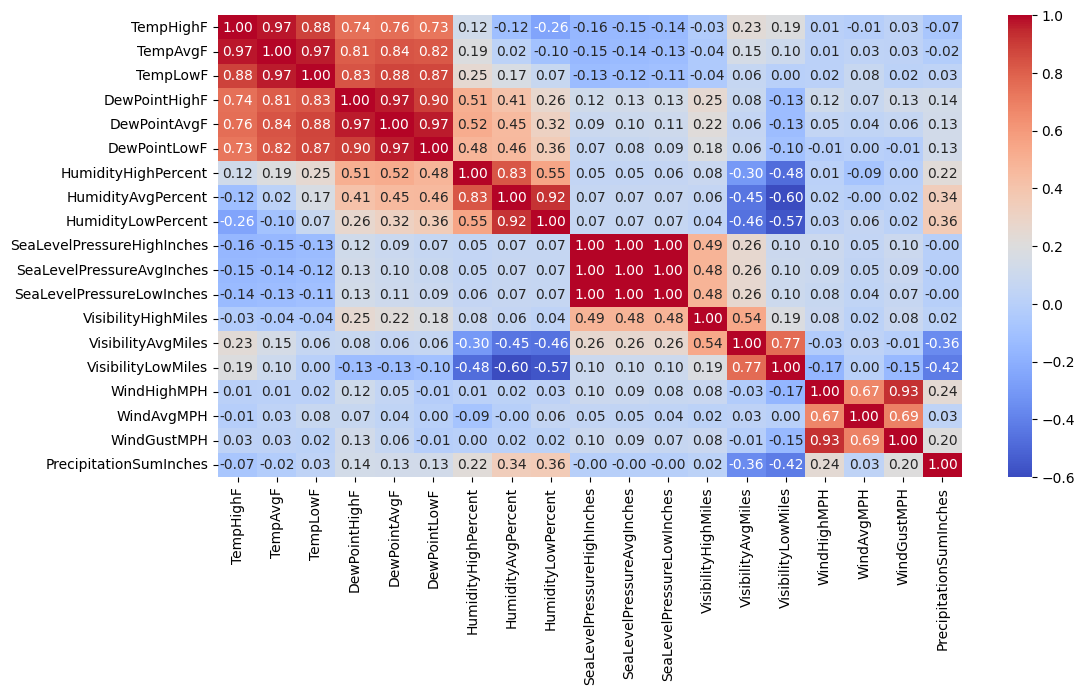

In [71]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(aw_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

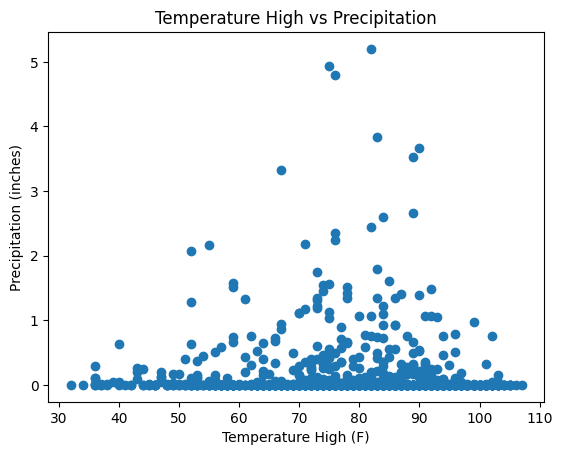

In [ ]:
# Plotting Temperature vs Precipitation
plt.scatter(aw_df['TempHighF'], aw_df['PrecipitationSumInches'])
plt.xlabel('Temperature (F)')
plt.ylabel('Precipitation (inches)')
plt.title('Temperature vs Precipitation')
plt.show()

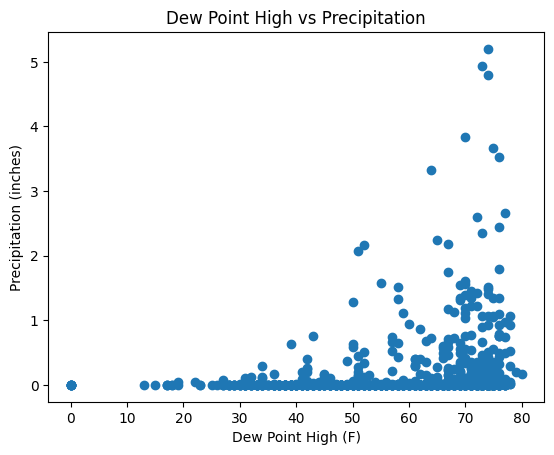

In [ ]:
# Plotting dew point vs precipitation
plt.scatter(aw_df['DewPointHighF'], aw_df['PrecipitationSumInches'])
plt.xlabel('Dew Point (F)')
plt.ylabel('Precipitation (inches)')
plt.title('Dew Point vs Precipitation')
plt.show()

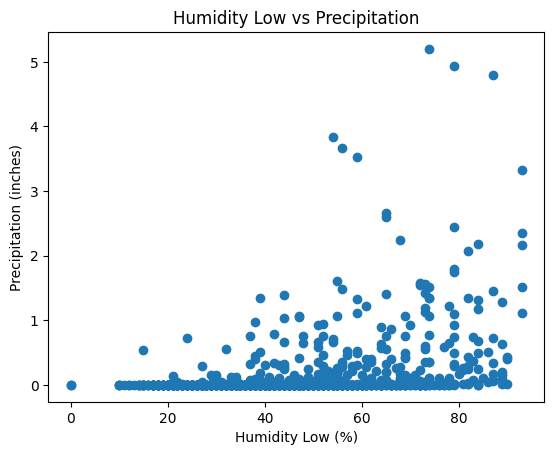

In [ ]:
# Plotting Humidity vs Precipitation
plt.scatter(aw_df['HumidityLowPercent'], aw_df['PrecipitationSumInches'])
plt.xlabel('Humidity (%)')
plt.ylabel('Precipitation (inches)')
plt.title('Humidity vs Precipitation')
plt.show()

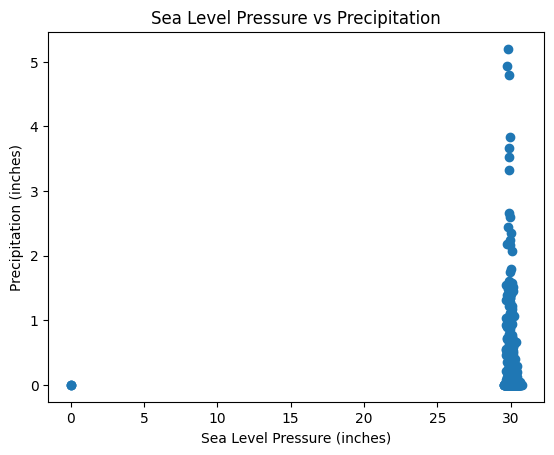

In [95]:
# Plotting sea level pressure vs precipitation
plt.scatter(aw_df['SeaLevelPressureAvgInches'], aw_df['PrecipitationSumInches'])
plt.xlabel('Sea Level Pressure (inches)')
plt.ylabel('Precipitation (inches)')
plt.title('Sea Level Pressure vs Precipitation')
plt.show()

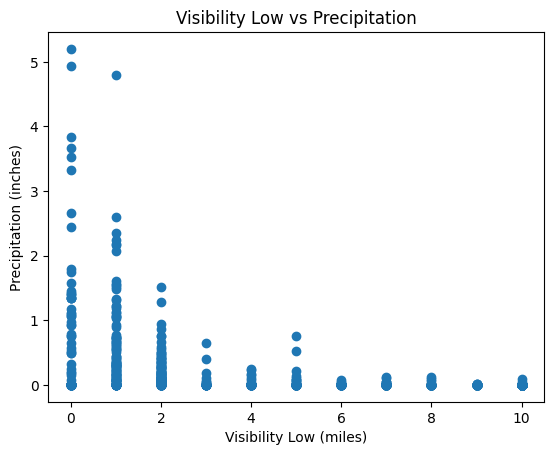

In [ ]:
# Plotting Visibility vs Precipitation
plt.scatter(aw_df['VisibilityLowMiles'], aw_df['PrecipitationSumInches'])
plt.xlabel('Visibility (miles)')
plt.ylabel('Precipitation (inches)')
plt.title('Visibility vs Precipitation')
plt.show()

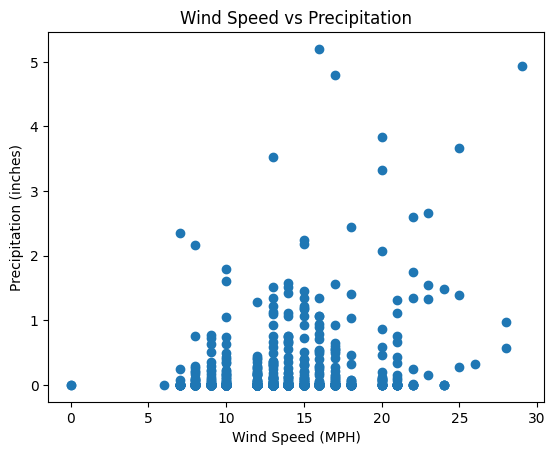

In [94]:
# Plotting wind speed vs precipitation
plt.scatter(aw_df['WindHighMPH'], aw_df['PrecipitationSumInches'])
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Precipitation (inches)')
plt.title('Wind Speed vs Precipitation')
plt.show()

In [96]:
def temporal_train_test_split(df, test_size=0.2):
    """
    Splits the DataFrame into training and testing sets based on time.
    """
    train_size = int(len(df) * (1 - test_size))
    train_df = df.iloc[:train_size]
    test_df = df.iloc[train_size:]
    return train_df, test_df

In [97]:
# Selecting features for the model
# The features are chosen based on their correlation with the target variable 'PrecipitationSumInches'
selected_features = ['TempHighF','DewPointHighF','HumidityLowPercent','VisibilityLowMiles','WindHighMPH']

X = aw_df[selected_features]
y = aw_df['PrecipitationSumInches']

# Splitting the dataset into training and testing sets
X_train, X_test = temporal_train_test_split(X, test_size=0.2)
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

In [98]:
# Creating and training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lr_model.predict(X_test)
y_pred = pd.Series(y_pred, index=y_test.index)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.05154173623681227
R-squared: 0.06339705163417275


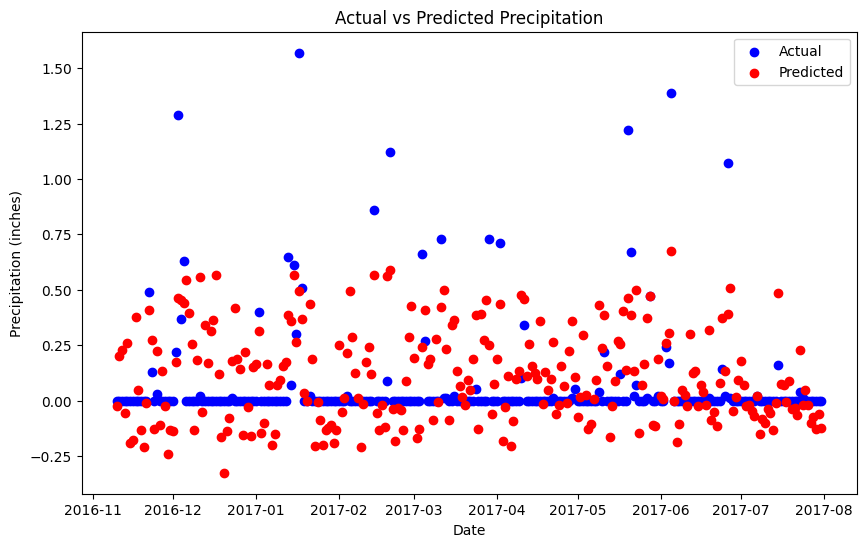

In [99]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual')
plt.scatter(y_pred.index, y_pred, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Actual vs Predicted Precipitation')
plt.legend()
plt.show()